# Package ingest

In [45]:
# Importing Python packages

import pandas as pd
import numpy as np
import plotnine as p9
import os
import geopandas as gpd
from pathlib import Path


# Data ingest

In [46]:
# Reading in phased development data
phased_development = pd.read_csv('pipeline_example_output.csv').drop(['Unnamed: 0'],axis = 1)
phased_development.head(2)

,ProjectID,land_use,year,percent_development_pa,status,development_pa
0,Riyadh,Residential - Villas Emiratis (Units),2024,1.0,Under Construction,0.0
1,2100.0,Residential - Villas Emiratis (Units),2024,1.0,Under Construction,944300.0


In [47]:
# Reading in baseline TAZ data

sharepoint_path = f'C:/Users/{os.environ.get( "USERNAME" )}/Buro Happold'
project_path = Path(f"{sharepoint_path}/P060927 Plan Capital 2040 - 02_Documents/11_GIS/05 Urban Models")
ium_path = os.path.join(project_path,'ium_ad.gpkg')
zone_taz_2022 = gpd.read_file(ium_path, layer='zone_taz_2022')
zone_taz_2022.head(2)


,Z,SHAPE_Length,SHAPE_Area,NUM_OF_BUILDINGS,Calc_Total_Ex_GFA,Ex_GFA,RES_GFA,Residential_Labour_GFA,OFFICE_GFA,RETAIL_GFA,...,RETMAL_PRO,MEDCLI_PRO,MEDHOS_PRO,NONTER_PRO,TER_PRO,SCHPLCS_NT,SCHPLCS_TE,SCHPLCS_PR,SCHPLCS_SE,geometry
0,1044,46364.0,600150.0,675.0,295592.0,296118.0,269986.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((270352.336 2727199.707, 269735..."
1,1310,98338.0,6727847.0,541.0,223794.0,224058.0,152630.0,0.0,0.0,6490.0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((278888.425 2680518.149, 278729..."


In [48]:
# Bringing in MP to TAZ development deltas

zone_taz_delta = gpd.read_file(ium_path, layer='zone_taz_delta')
zone_taz_delta.head(2)


,Z,ZONE,EPA,UPC_PRECIN,PRECINCT_N,ST_DIST_ID,ST_DIST_EN,UDM_DIST_I,UDM_DIST_E,REGION,...,score_ex_gfa_total_in_1km_rank,score_networkrail_nearest_m_rank,landmodel_component_rank_sum,landmodel_component_rank_mean,landmodel_component_rank_sum_rank,landmodel_component_rank_mean_rank,landmodel_development_score,gfa_per_ha,landmodel_limit_gfa_per_ha,geometry
0,1044,1044,None,7.0,Al Rahba,88.0,Al Rahba,1.0,AL RAHBA,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1410.696039,NaN,"MULTIPOLYGON (((270352.336 2727199.707, 269735..."
1,1310,1310,None,13.0,Baniyas,95.0,Al Nahda,54.0,AL NAHDA,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,153.469220,NaN,"MULTIPOLYGON (((278888.425 2680518.149, 278729..."


In [49]:
# Increasing the development capacity limits by a multiplier for prototyping purposes
zone_taz_delta['landmodel_limit_gfa_per_ha']  = zone_taz_delta['landmodel_limit_gfa_per_ha']
zone_taz_delta['max_capacity'] = zone_taz_delta['landmodel_limit_gfa_per_ha'] * zone_taz_delta['AREA']
zone_taz_delta.head(2)

,Z,ZONE,EPA,UPC_PRECIN,PRECINCT_N,ST_DIST_ID,ST_DIST_EN,UDM_DIST_I,UDM_DIST_E,REGION,...,score_networkrail_nearest_m_rank,landmodel_component_rank_sum,landmodel_component_rank_mean,landmodel_component_rank_sum_rank,landmodel_component_rank_mean_rank,landmodel_development_score,gfa_per_ha,landmodel_limit_gfa_per_ha,geometry,max_capacity
0,1044,1044,None,7.0,Al Rahba,88.0,Al Rahba,1.0,AL RAHBA,ADM,...,NaN,0.0,NaN,NaN,NaN,NaN,1410.696039,NaN,"MULTIPOLYGON (((270352.336 2727199.707, 269735...",NaN
1,1310,1310,None,13.0,Baniyas,95.0,Al Nahda,54.0,AL NAHDA,ADM,...,NaN,0.0,NaN,NaN,NaN,NaN,153.469220,NaN,"MULTIPOLYGON (((278888.425 2680518.149, 278729...",NaN


In [50]:
# Calculating gfa development capacity caps for each TAZ

taz_max_capacities = zone_taz_delta[['ZONE','masterplan_projectid','AREA','landmodel_limit_gfa_per_ha','2022_Ex_GFA']]
taz_max_capacities['max_capacity_gfa'] = taz_max_capacities['AREA'] * taz_max_capacities['landmodel_limit_gfa_per_ha']
taz_max_capacities = taz_max_capacities[['ZONE','masterplan_projectid','max_capacity_gfa','2022_Ex_GFA']]
taz_max_capacities.head(5)

C:\Users\jtindale\AppData\Local\Temp\ipykernel_26092\2998544897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ZONE,masterplan_projectid,max_capacity_gfa,2022_Ex_GFA
0,1044,None,NaN,296118.0
1,1310,None,NaN,224058.0
2,2656,None,NaN,1091.0
3,1318,None,NaN,102379.0
4,1320,None,NaN,8977.0


In [51]:
zone_taz_delta[['landmodel_limit_gfa_per_ha']].drop_duplicates()

,landmodel_limit_gfa_per_ha
0,NaN
17,10000.0
23,5000.0
24,50000.0
25,2500.0
32,1000.0


C:\Users\jtindale\AppData\Local\Temp\ipykernel_26092\3955201484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\jtindale\AppData\Local\miniforge3\envs\landmodel\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 53'. Pick better value with 'binwidth'.


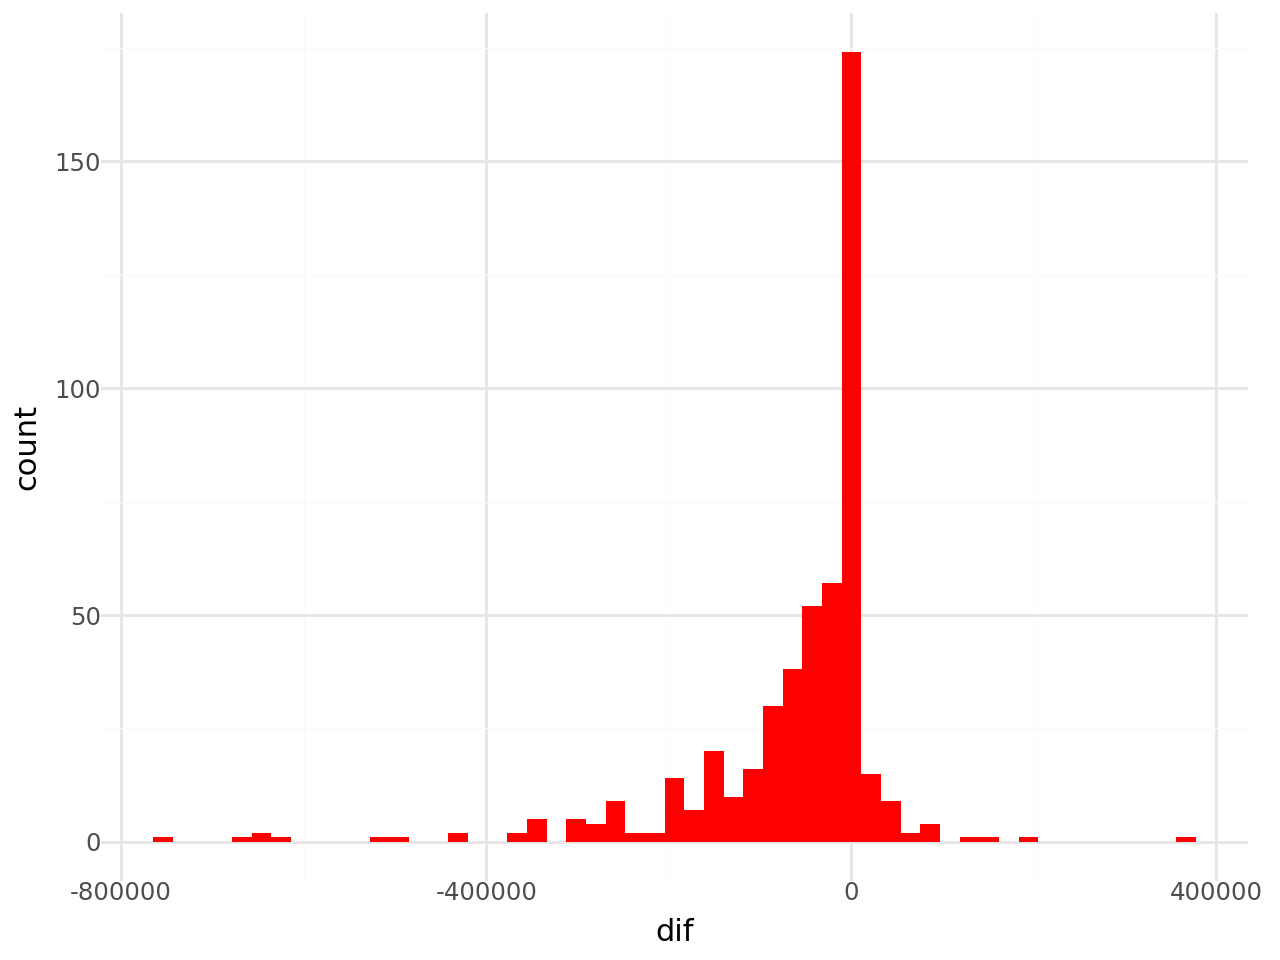

In [52]:
# Checking for whether max capacity estimates may be lower than existing GFA

test = taz_max_capacities.dropna()
test['dif'] = test['max_capacity_gfa'] - test['2022_Ex_GFA']
(p9.ggplot(test,p9.aes(x = 'dif')) +
 p9.geom_histogram(fill = 'red') +
 p9.theme_minimal())

In [53]:
# Creating a dataframe that identifies available capacity for development in each TA|

taz_available_capacity = zone_taz_delta[['ZONE','masterplan_projectid','2022_Ex_GFA','max_capacity','landmodel_component_rank_sum_rank']]
taz_available_capacity = taz_available_capacity[~taz_available_capacity['masterplan_projectid'].isna()]
taz_available_capacity['available_capacity'] = taz_available_capacity['max_capacity'] - taz_available_capacity['2022_Ex_GFA']
taz_available_capacity.head(2)



,ZONE,masterplan_projectid,2022_Ex_GFA,max_capacity,landmodel_component_rank_sum_rank,available_capacity
17,1998,5000.34,4993.0,33268.7,0.457746,28275.7
18,1965,5000.0,120797.0,NaN,0.068182,NaN


In [54]:
# Removing TAZs where there is no available capacity

taz_available_capacity['available_capacity'] = taz_available_capacity['available_capacity'].apply(lambda x: 0 if pd.isna(x) or x < 0 else x)
taz_available_capacity = taz_available_capacity[taz_available_capacity['available_capacity'] > 0]
taz_available_capacity


,ZONE,masterplan_projectid,2022_Ex_GFA,max_capacity,landmodel_component_rank_sum_rank,available_capacity
17,1998,5000.34,4993.0,33268.70,0.457746,28275.70
23,2019,5000.0,6727.0,10267.25,0.545455,3540.25
24,2021,5000.0,1066.0,47918.50,0.102273,46852.50
34,2023,5000.0,1220.0,55714.50,0.204545,54494.50
37,2031,5000.0,113.0,6419.85,0.613636,6306.85
...,...,...,...,...,...,...
2359,288,18495.2,0.0,308.20,0.900000,308.20
2365,2631,18495.2,0.0,266.95,0.980000,266.95
2418,301,1089.65,0.0,7872.00,0.294118,7872.00
2419,329,1089.65,356.0,427.95,0.823529,71.95


In [55]:
# Picking out masterplan ids from those with available capacity

mp_available_capacity_list = taz_available_capacity[['masterplan_projectid']].drop_duplicates()
mp_available_capacity_list = mp_available_capacity_list['masterplan_projectid'].tolist()
print(mp_available_capacity_list)

['5000.34', '5000.0', '1086.3', '1170.0', '1097.40', '1089.62', '1072.0', '1097.34', '17860.0', 'Riyadh', '6034.0', '1113.25', '1137.0', '1996.0', '1997.0', '2100.0', '5222.0', '1114.0', '6033.0', '1007.42.4', '1007.38', '1007.45', '1007.27', '15090.1', '21703.0', '1113.6.12.1', '1164.0', '25983.0', '17407.0', '1113.3.3', '1113.6', '1001.8.1', '18495.2', '1089.65']


In [56]:
# Creating function for creating dataframes with the cumulative capacity across TAZs in an MP and then ordering them based on the TAZ's scores

def cumulative_capacity_function(mp_list):
    
    df_list = []
    
    for mp in mp_list:
        
        df = taz_available_capacity[taz_available_capacity['masterplan_projectid'] == mp].sort_values(by=['landmodel_component_rank_sum_rank'],ascending = False).reset_index(drop = True)
        df['cum_development'] = df['available_capacity'].cumsum()
        df = df[['masterplan_projectid','ZONE','cum_development']].reset_index(drop =True)
        df_list.append(df) 
    # Concatenate all DataFrames in the list along the rows (axis=0)
    result_df = pd.concat(df_list, axis=0)
    
    return result_df

# Running function

taz_cumulative_capacity = cumulative_capacity_function(mp_available_capacity_list)
taz_cumulative_capacity.head(3)


,masterplan_projectid,ZONE,cum_development
0,5000.34,3358,11170.25
1,5000.34,3396,18730.80
2,5000.34,3359,34155.15


In [57]:
# Creating a dataframe that contains cumulative development by masterplan per year

mp_cumulative_development= phased_development[['ProjectID', 'year', 'development_pa']]
mp_cumulative_development['cumulative_development'] = mp_cumulative_development.groupby(['ProjectID', 'year'])['development_pa'].cumsum().reset_index(drop=True)
mp_cumulative_development = mp_cumulative_development.drop(['development_pa'],axis=1).drop_duplicates().reset_index(drop = True)
mp_cumulative_development['cumulative_development'] = mp_cumulative_development['cumulative_development'].astype(float)
mp_cumulative_development = mp_cumulative_development[mp_cumulative_development['cumulative_development'] > 0].reset_index(drop = True)
mp_cumulative_development.head(2)

C:\Users\jtindale\AppData\Local\Temp\ipykernel_26092\2400619848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ProjectID,year,cumulative_development
0,2100.0,2024,944300.0
1,1994.0,2024,615600.0


In [58]:
# Defining a function that allocates total development to MPs to TAZs

def mp_to_taz_function(mp_id):
    
    df = taz_cumulative_capacity[taz_cumulative_capacity['masterplan_projectid'] == mp_id]
    df_2 = mp_cumulative_development[mp_cumulative_development['ProjectID'] == mp_id]
    df_2 = df_2.groupby('year')['cumulative_development'].sum().reset_index()
    df_2['cumulative_development'] = df_2['cumulative_development'].cumsum()
    
    # Create a copy of the test DataFrame
    df_3 = df
    # Iterate over the columns and indices
    for col, idx in zip(df_2['year'], df_2['cumulative_development']):
        # Create a boolean mask where 'cum_development' is less than 'idx'
        mask = df_3['cum_development'] < idx
        # Apply the mask to update the column with 'cum_development' values or 0
        df_3[col] = df_3['cum_development'].where(mask, 0)

    df_3 = df_3.melt(id_vars = ['masterplan_projectid','ZONE','cum_development']).rename({'variable':'year'},axis = 1)
    df_3 = df_3.merge(df_2,how = 'left',on = 'year')
    df_3['value_2'] = df_3.apply(lambda row: 0 if row['value'] != 0 else  row['cumulative_development'] - row['cum_development'],axis = 1)
    
    df_3_split= df_3[['ZONE','year','value_2']]
    df_3_split = df_3_split[df_3_split['value_2'] != 0]

    # Group by 'year' and find the index of the minimum 'value'
    idx = df_3_split.groupby('year')['value_2'].idxmax()

    # Select the rows that correspond to the minimum value in each year
    df_3_split = df_3_split.loc[idx]
    df_3_split = df_3_split.merge(df_2,how = 'left', on = 'year')
    df_3_split['value_2'] = df_3_split['cumulative_development']
    df_3_split = df_3_split[['ZONE','year','value_2']].rename({'value_2':'value'},axis = 1)

    df_3_split_2 = df_3[['ZONE','year','value']]
    df_3_split_2 = df_3_split_2[df_3_split_2['value'] != 0]
    results_df = pd.concat([df_3_split,df_3_split_2],axis = 0).sort_values(['year','value']).reset_index(drop = True)
    return(results_df)

In [59]:
mp_ids = mp_cumulative_development['ProjectID'].drop_duplicates().tolist()
print(mp_ids)

['2100.0', '1994.0', '1089.62', '1042.0', '1097.34', '1085.0', '1740.0', '1235.0', '1114.1', '1113.8', '5365.0', '1113.9', '1119.0', '21227.0', '1413.0', '24996.0', '23168.0', '1113.6', '2897.0', '12222.0', '1113.27', '2115.2.1', 'Riyadh', '1996.0', '1995.0', 'ICAD 1', '1146.0', '1097.40', '1633.0', '1032.0', '1113.3.3', '6029.0', '6033.0', '1236.0', '1086.3', '1089.56', '1783.0', '26626.0', '25983.0', '35581.0', '32379.0', '5000.34', '12698.0', '18495.2', '6034.0', '38190.0', '1007.42.1', '1113.6.12.4', '1113.6.12.2', '17158.3', '5746.0', '32592.0', '24640.0', '11220.0', '1113.24.x', '18211.0', '1113.17', '33436.0', '21661.0', '1113.21', '15090.1', '21257.0', '15694.0', '1113.28', '5222.0', '17158.0', '17158.4', '21301.0', '1113.6.12.3', '26239.0', '18932.0', '1113.6.12.1', '21592.0', '39724.0', '25258.0', '17860.0', '24811.0', '18916.0', 'Z9_MBZ', '21703.0', '33416.0', '36016.0', '33450.0', '1137.0', '1007.38', '1007.42.4', '1997.1', '1089.65', '1113.16', '23037.0', '15690.0', '5251.

In [60]:
# Creating a list to contain the results of running the phasing funciton

my_results = []

# Running the function through a for loop

for mp_id in mp_ids:
    my_df = mp_to_taz_function(mp_id)  # Assume mp_to_taz_function is defined and returns a DataFrame
    my_results.append(my_df)

my_results
#test = pd.concat(my_results, axis=0)

C:\Users\jtindale\AppData\Local\Temp\ipykernel_26092\3014322845.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jtindale\AppData\Local\Temp\ipykernel_26092\3014322845.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jtindale\AppData\Local\Temp\ipykernel_26092\3014322845.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

[   ZONE  year      value
 0   947  2024    730.680
 1   982  2024   7932.055
 2  3111  2024   9709.555
 3  3153  2024  11398.705
 4  3098  2024  15335.255
 5  3133  2024  22141.255
 6   980  2024  74348.755,
 Empty DataFrame
 Columns: [ZONE, year, value]
 Index: [],
    ZONE  year   value
 0   243  2024   668.4
 1   247  2024  1941.9,
 Empty DataFrame
 Columns: [ZONE, year, value]
 Index: [],
     ZONE  year    value
 0    304  2024    45.75
 1    279  2024   168.35
 2    257  2024   265.85
 3    268  2024  1117.05
 4    261  2024  2483.05
 5    304  2025    45.75
 6    279  2025   168.35
 7    257  2025   265.85
 8    268  2025  1117.05
 9    261  2025  2483.05
 10   304  2026    45.75
 11   279  2026   168.35
 12   257  2026   265.85
 13   268  2026  1117.05
 14   261  2026  2483.05
 15   304  2027    45.75
 16   279  2027   168.35
 17   257  2027   265.85
 18   268  2027  1117.05
 19   261  2027  2483.05
 20   304  2028    45.75
 21   279  2028   168.35
 22   257  2028   265.85
 23

In [61]:
test = pd.concat(my_results, axis=0)
test.describe()

,ZONE,value
count,682.000000,6.820000e+02
mean,1578.651026,8.141172e+04
std,1237.836902,2.199275e+05
min,17.000000,4.575000e+01
25%,301.000000,4.642500e+02
50%,1199.500000,2.968000e+03
75%,2856.000000,2.628600e+04
max,3396.000000,1.276435e+06


In [65]:
test

,ZONE,year,value
0,947,2024,730.680
1,982,2024,7932.055
2,3111,2024,9709.555
3,3153,2024,11398.705
4,3098,2024,15335.255
...,...,...,...
31,329,2039,314.670
32,301,2039,8186.670
33,306,2040,242.720
34,329,2040,314.670


def mp_to_taz_function(mp_id, taz_cumulative_capacity, mp_cumulative_development):
    # Check if necessary columns exist
    necessary_columns_taz = {'masterplan_projectid', 'cum_development'}
    if not necessary_columns_taz.issubset(taz_cumulative_capacity.columns):
        raise ValueError(f"taz_cumulative_capacity DataFrame is missing columns: {necessary_columns_taz - set(taz_cumulative_capacity.columns)}")

    necessary_columns_mp = {'ProjectID', 'year', 'cumulative_development'}
    if not necessary_columns_mp.issubset(mp_cumulative_development.columns):
        raise ValueError(f"mp_cumulative_development DataFrame is missing columns: {necessary_columns_mp - set(mp_cumulative_development.columns)}")

    df = taz_cumulative_capacity[taz_cumulative_capacity['masterplan_projectid'] == mp_id]
    df_2 = mp_cumulative_development[mp_cumulative_development['ProjectID'] == mp_id]
    
    df_2 = df_2.groupby('year')['cumulative_development'].sum().reset_index()
    df_2['cumulative_development'] = df_2['cumulative_development'].cumsum()
    
    # Validate and create necessary DataFrame for operations
    df_3 = df.copy()
    if 'year' not in df_3.columns:
        raise KeyError("Column 'year' is missing in DataFrame after initial operations.")
    
    # Ensure DataFrame df_3 has columns 'cum_development'
    if 'cum_development' not in df_3.columns:
        df_3['cum_development'] = 0  # Assuming default to 0 if column doesn't exist

    df_3 = df_3.melt(id_vars=['masterplan_projectid', 'ZONE', 'cum_development'], value_vars=['year'], var_name='year')
    df_3 = df_3.merge(df_2, how='left', on='year')
    
    df_3['value_2'] = df_3.apply(lambda row: 0 if row['value'] != 0 else row['cumulative_development'] - row['cum_development'], axis=1)
    
    df_3_split = df_3[['ZONE', 'year', 'value_2']]
    df_3_split = df_3_split[df_3_split['value_2'] != 0]

    idx = df_3_split.groupby('year')['value_2'].idxmax()

    df_3_split = df_3_split.loc[idx]
    df_3_split = df_3_split.merge(df_2, how='left', on='year')
    df_3_split['value_2'] = df_3_split['cumulative_development']

    df_3_split = df_3_split[['ZONE', 'year', 'value_2']].rename({'value_2': 'value'}, axis=1)

    df_3_split_2 = df_3[['ZONE', 'year', 'value']]
    results_df = pd.concat([df_3_split, df_3_split_2], axis=0)
    
    return results_df

# Example usage:
results = mp_to_taz_function('Riyadh', taz_cumulative_capacity, mp_cumulative_development)

In [ ]:
taz_available_capacity

,ZONE,masterplan_projectid,2022_Ex_GFA,max_capacity,landmodel_component_rank_sum_rank,available_capacity
17,1998,5000.34,4993.0,66537.40,0.457746,61544.40
21,1988,5000.0,7595.0,8582.60,0.397727,987.60
22,2015,5000.0,286496.0,556462.60,0.431818,269966.60
23,2019,5000.0,6727.0,20534.50,0.545455,13807.50
24,2021,5000.0,1066.0,95837.00,0.102273,94771.00
...,...,...,...,...,...,...
2365,2631,18495.2,0.0,533.90,0.980000,533.90
2418,301,1089.65,0.0,15744.00,0.294118,15744.00
2419,329,1089.65,356.0,855.90,0.823529,499.90
2420,306,1089.65,0.0,485.44,1.000000,485.44


In [ ]:
# Create a copy of the test DataFrame
test_4

# Add new columns based on conditions
#test_3['2024'] = test_3['cum_development'] < test_2.iloc[0]['cumulative_development']
#test_3['2025'] = test_3['cum_development'] < test_2.iloc[1]['cumulative_development']
#test_3['2026'] = test_3['cum_development'] < test_2.iloc[2]['cumulative_development']
#test_3['2027'] = test_3['cum_development'] < test_2.iloc[3]['cumulative_development']
# Print the updated DataFrame
#test_3

,ZONE,year,value
0,1166,2024,38085.40
1,1088,2025,76170.80
2,1114,2026,114256.20
0,1076,2024,36.64
1,1102,2024,701.10
...,...,...,...
403,1251,2040,51092.45
404,1253,2040,75290.45
405,1088,2040,91261.45
406,1106,2040,104752.45


In [ ]:
print(test_3)

    

    masterplan_projectid  ZONE  cum_development  year      value  \
0                 Riyadh  1076            36.64  2024      36.64   
1                 Riyadh  1102           701.10  2024     701.10   
2                 Riyadh  1080          3579.40  2024    3579.40   
3                 Riyadh  1087          5273.45  2024    5273.45   
4                 Riyadh  1094          7008.50  2024    7008.50   
..                   ...   ...              ...   ...        ...   
403               Riyadh  1251         51092.45  2040   51092.45   
404               Riyadh  1253         75290.45  2040   75290.45   
405               Riyadh  1088         91261.45  2040   91261.45   
406               Riyadh  1106        104752.45  2040  104752.45   
407               Riyadh  1114        121669.45  2040  121669.45   

     cumulative_development  value_2  
0                   38085.4      0.0  
1                   38085.4      0.0  
2                   38085.4      0.0  
3                   38085.4

In [ ]:
print(my_list)

NameError: name 'my_list' is not defined

In [ ]:

test_2['']
#test = test[['year','cumulative_development']]
#test_new_column_names = test.iloc[0].tolist()
#test.columns = test_new_column_names
#test = test.drop('year').reset_index(drop = True)
#test

,ProjectID,year,cumulative_development
0,5000.34,2029,27603.666667
1,5000.34,2030,27603.666667
2,5000.34,2031,27603.666667
3,5000.34,2032,27603.666667
4,5000.34,2033,27603.666667
5,5000.34,2034,27603.666667
6,5000.34,2035,27603.666667
7,5000.34,2036,27603.666667
8,5000.34,2037,27603.666667
9,5000.34,2038,27603.666667


In [ ]:
#test_2 = taz_cumulative_capacity[taz_cumulative_capacity['masterplan_projectid'] == '5000.34']
#test_2

,masterplan_projectid,ZONE,cum_development
0,5000.34,3358,24379.5
1,5000.34,3396,39500.6
2,5000.34,3359,70349.3
3,5000.34,1998,131893.7
4,5000.34,3348,195163.5
5,5000.34,3376,271155.9
6,5000.34,3350,341622.1
7,5000.34,3355,380678.7
8,5000.34,1993,786719.7
9,5000.34,2006,1045544.7


In [ ]:
#test_3 = pd.concat([test_2,test], axis = 1)
#test_3 = test_3.apply(lambda x: x.fillna(x.max()) if x.dtype.kind in 'biufc' else x)
#test_3
#test_4 = test_3
#numerical_cols = test_4.select_dtypes(include=['number']).columns
#numerical_cols = numerical_cols.drop('cum_development')
#test_4[numerical_cols] = test_4[numerical_cols].sub(test_4['cum_development'], axis=0)

#test_4

In [ ]:
# Ingesting MP land use to TAZ land use crosswalk
crosswalks = pd.read_csv('taxonomy_crosswalks.csv')
crosswalks = crosswalks[crosswalks['crosswalk'] == 'MP Committed Development to GIS Use']

# Filtering out the following land uses from the crosswalk dataframe
mp_land_use_exclusion = ['Residential - Labour Accommodation (Units)'] #  Land uses to exclude for the crosswalk
crosswalks = crosswalks[~crosswalks['variable_1'].isin(mp_land_use_exclusion)] # Filtering the crosswalk
crosswalks = crosswalks.drop('Notes',axis = 1) # Dropping notes column
crosswalks


,crosswalk,variable_1,variable_2
0,MP Committed Development to GIS Use,Residential - Villas Emiratis (Units),Villa_Units
1,MP Committed Development to GIS Use,Residential - Villas Non-Emiratis (Units),Villa_Units
2,MP Committed Development to GIS Use,Residential - Apartments (Units),Apt_Units
4,MP Committed Development to GIS Use,Retail (GFA),RETAIL_GFA
5,MP Committed Development to GIS Use,Retail (GFA),Commercial_Recreation_GFA
6,MP Committed Development to GIS Use,Office (GFA),OFFICE_GFA
7,MP Committed Development to GIS Use,Industrial (GFA),INDUSTRIAL_GFA
8,MP Committed Development to GIS Use,Hotel (Units),Hotel_Rooms
9,MP Committed Development to GIS Use,Community Facilities (GFA),RELIGIOUS_GFA
10,MP Committed Development to GIS Use,Community Facilities (GFA),GOV_INST_SOC_CULT_GFA


In [ ]:
# Creating a list columns to create the taz_existing_gfa dataframe

land_uses_2022 = ['ZONE','masterplan_projectid','2022_NUM_OF_BUILDINGS','2022_Calc_Total_Ex_GFA','2022_Ex_GFA','2022_RES_GFA','2022_Residential_Labour_GFA','2022_OFFICE_GFA','2022_RETAIL_GFA','2022_Hotel_GFA','2022_Commercial_Recreation_GFA','2022_Industrial_GFA','2022_SCHOOL_GFA','2022_MED_GFA','2022_RELIGIOUS_GFA','2022_GOV_INST_SOC_CULT_GFA','2022_OPENSPACE_RECREATION_GFA','2022_Community_Facilities_GFA','2022_AGRICULTURE_GFA','2022_OTHER_GFA','2022_ST_Other_GFA','2022_INFRASTRUCTURE_GFA','2022_Hotel_Rooms','2022_Villa_Units','2022_Apt_Units','2022_HH','2022_HOTELROOMS']

# Creating the dataframe with existing TAZ gfa

taz_existing_gfa = zone_taz_delta.loc[:,land_uses_2022]
taz_existing_gfa

,ZONE,masterplan_projectid,2022_NUM_OF_BUILDINGS,2022_Calc_Total_Ex_GFA,2022_Ex_GFA,2022_RES_GFA,2022_Residential_Labour_GFA,2022_OFFICE_GFA,2022_RETAIL_GFA,2022_Hotel_GFA,...,2022_Community_Facilities_GFA,2022_AGRICULTURE_GFA,2022_OTHER_GFA,2022_ST_Other_GFA,2022_INFRASTRUCTURE_GFA,2022_Hotel_Rooms,2022_Villa_Units,2022_Apt_Units,2022_HH,2022_HOTELROOMS
0,1044,None,675.0,295592.0,296118.0,269986.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1124.0,1124.0,753.0,0.0,329.0,11.0,340.0,0.0
1,1310,None,541.0,223794.0,224058.0,152630.0,0.0,0.0,6490.0,0.0,...,0.0,12060.0,16703.0,16703.0,916.0,0.0,154.0,16.0,170.0,0.0
2,2656,None,6.0,1091.0,1091.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1091.0,0.0,0.0,0.0,0.0,0.0
3,1318,None,738.0,102025.0,102379.0,11129.0,0.0,0.0,0.0,0.0,...,0.0,90273.0,90864.0,90864.0,31.0,0.0,2.0,0.0,2.0,0.0
4,1320,None,5.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,790,1995.0,224.0,195698.0,195698.0,9960.0,0.0,2020.0,0.0,0.0,...,0.0,0.0,29098.0,29098.0,13755.0,0.0,0.0,0.0,0.0,0.0
2434,3474,1995.0,209.0,217530.0,217693.0,24626.0,0.0,749.0,11341.0,0.0,...,0.0,0.0,4024.0,4024.0,64.0,0.0,0.0,0.0,0.0,0.0
2435,787,1994.0,151.0,281700.0,281771.0,9440.0,0.0,0.0,0.0,0.0,...,0.0,0.0,472.0,472.0,162.0,0.0,0.0,0.0,0.0,0.0
2436,3475,1995.0,67.0,105935.0,105935.0,8877.0,0.0,0.0,1931.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
taz_existing_gfa

,ZONE,masterplan_projectid,2022_NUM_OF_BUILDINGS,2022_Calc_Total_Ex_GFA,2022_Ex_GFA,2022_RES_GFA,2022_Residential_Labour_GFA,2022_OFFICE_GFA,2022_RETAIL_GFA,2022_Hotel_GFA,...,2022_Community_Facilities_GFA,2022_AGRICULTURE_GFA,2022_OTHER_GFA,2022_ST_Other_GFA,2022_INFRASTRUCTURE_GFA,2022_Hotel_Rooms,2022_Villa_Units,2022_Apt_Units,2022_HH,2022_HOTELROOMS
0,1044,None,675.0,295592.0,296118.0,269986.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1124.0,1124.0,753.0,0.0,329.0,11.0,340.0,0.0
1,1310,None,541.0,223794.0,224058.0,152630.0,0.0,0.0,6490.0,0.0,...,0.0,12060.0,16703.0,16703.0,916.0,0.0,154.0,16.0,170.0,0.0
2,2656,None,6.0,1091.0,1091.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1091.0,0.0,0.0,0.0,0.0,0.0
3,1318,None,738.0,102025.0,102379.0,11129.0,0.0,0.0,0.0,0.0,...,0.0,90273.0,90864.0,90864.0,31.0,0.0,2.0,0.0,2.0,0.0
4,1320,None,5.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,790,1995.0,224.0,195698.0,195698.0,9960.0,0.0,2020.0,0.0,0.0,...,0.0,0.0,29098.0,29098.0,13755.0,0.0,0.0,0.0,0.0,0.0
2434,3474,1995.0,209.0,217530.0,217693.0,24626.0,0.0,749.0,11341.0,0.0,...,0.0,0.0,4024.0,4024.0,64.0,0.0,0.0,0.0,0.0,0.0
2435,787,1994.0,151.0,281700.0,281771.0,9440.0,0.0,0.0,0.0,0.0,...,0.0,0.0,472.0,472.0,162.0,0.0,0.0,0.0,0.0,0.0
2436,3475,1995.0,67.0,105935.0,105935.0,8877.0,0.0,0.0,1931.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
